<a href="https://colab.research.google.com/github/vaishnavir33/hpe/blob/main/What_%26_Filename.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install gensim==3.8.3

     |████████████████████████████████| 24.2MB 105kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('/content/drive/MyDrive/HPE/Sent/Results New.xlsx')
df.head()

,CommitID,Subject,Authname,Authmail,Commname,Commmail,Modf,Added,Dltd,Fname,What,Why
0,11ea255283509a9f016f378df4865235a25b1851,[SPARK-35111][SQL] Support Cast string to year...,Angerszhuuuu,angers.zhu@gmail.com,Max Gekk,max.gekk@gmail.com,TRUE,False,False,sql/catalyst/src/main/scala/org/apache/spark/s...,Support Cast string to year-month intervalSupp...,Support Cast string to year-month interval
1,11ea255283509a9f016f378df4865235a25b1851,[SPARK-35111][SQL] Support Cast string to year...,Angerszhuuuu,angers.zhu@gmail.com,Max Gekk,max.gekk@gmail.com,TRUE,False,False,sql/catalyst/src/main/scala/org/apache/spark/s...,Support Cast string to year-month intervalSupp...,Support Cast string to year-month interval
2,11ea255283509a9f016f378df4865235a25b1851,[SPARK-35111][SQL] Support Cast string to year...,Angerszhuuuu,angers.zhu@gmail.com,Max Gekk,max.gekk@gmail.com,TRUE,False,False,sql/catalyst/src/test/scala/org/apache/spark/s...,Support Cast string to year-month intervalSupp...,Support Cast string to year-month interval
3,2d2f467831d17df38fc6522da5066a8d848caaf5,[SPARK-35169][SQL] Fix wrong result of min ANS...,Angerszhuuuu,angers.zhu@gmail.com,Wenchen Fan,wenchen@databricks.com,TRUE,False,False,sql/catalyst/src/main/scala/org/apache/spark/s...,Before this patchWrong result of min ANSI inte...,Fix bug
4,2d2f467831d17df38fc6522da5066a8d848caaf5,[SPARK-35169][SQL] Fix wrong result of min ANS...,Angerszhuuuu,angers.zhu@gmail.com,Wenchen Fan,wenchen@databricks.com,TRUE,False,False,sql/core/src/test/resources/sql-tests/inputs/i...,Before this patchWrong result of min ANSI inte...,Fix bug


In [4]:
df.shape

(10737, 12)

In [5]:
df.isnull().sum()

CommitID    0
Subject     0
Authname    0
Authmail    0
Commname    0
Commmail    0
Modf        0
Added       0
Dltd        0
Fname       0
What        0
Why         0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df['Fname']= df['Fname'].astype(str)

In [8]:
what = df["What"].unique().tolist()
len(what)

1528

In [9]:
random.shuffle(what)

what_train = [what[i] for i in range(round(0.9*len(what)))]


train_df = df[df['What'].isin(what_train)]
validation_df = df[~df['What'].isin(what_train)]

In [10]:
changes_train = []


for i in tqdm(what_train):
    temp = train_df[train_df["What"] == i]["Fname"].tolist()
    changes_train.append(temp)

100%|██████████| 1375/1375 [00:01<00:00, 811.06it/s]


In [11]:
changes_val = []

for i in tqdm(validation_df['What'].unique()):
    temp = validation_df[validation_df["What"] == i]["Fname"].tolist()
    changes_val.append(temp)

100%|██████████| 153/153 [00:00<00:00, 1590.42it/s]


In [12]:
 #train word2vec model
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(changes_train, progress_per=200)

model.train(changes_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

(45563, 99260)

In [13]:
model.init_sims(replace=True)

In [14]:
print(model)

Word2Vec(vocab=592, size=100, alpha=0.03)


In [15]:
# extract all vectors
X = model[model.wv.vocab]

X.shape

(592, 100)

In [16]:
!pip install umap-learn

     |████████████████████████████████| 81kB 4.7MB/s 
     |████████████████████████████████| 1.2MB 16.2MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=5503722d4dde8e614705f3ba1b96ba8a01fa4041e4e2829ba912b9f999354d56
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51362 sha256=a7d886154b433b909974f80e766f7d503cb4eccb951938e784004bbe1c528e26
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


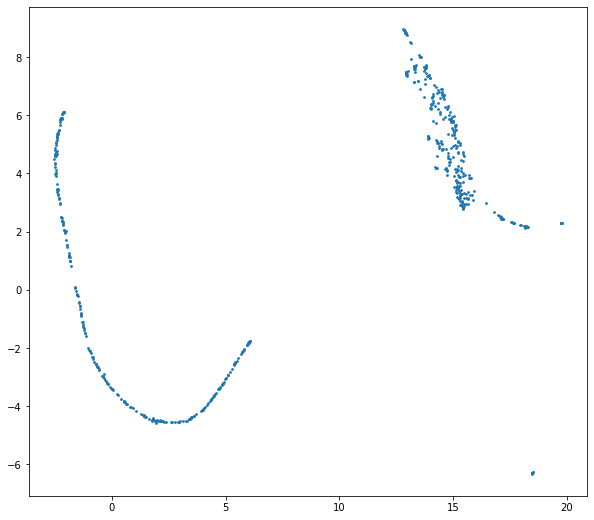

In [17]:
import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')